# Part 1 — Introduction

##  Logistic Regression from Scratch (Iris Dataset)

In this notebook, we’ll build a **Binary Logistic Regression** classifier **from scratch** using **Python + NumPy** — no scikit-learn models — to predict whether an Iris flower is **Setosa or not**.

**Key ideas:**
-  Sigmoid Function
-  Cross-Entropy Loss
-  Gradient Descent Optimization

---

**Dataset:** *Iris* (3 species, here we do binary: Setosa vs Not-Setosa)


 # Part 2 — Import Libraries & Load Iris Data

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris['data']  # shape (150, 4)
y = iris['target']  # 0 = Setosa, 1 = Versicolor, 2 = Virginica

# Convert to binary: Is Setosa or not
y_binary = (y == 0).astype(int)

# For simplicity, use only two features for easy 2D visualization
X = X[:, :2]  # sepal length & sepal width

# Add bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

print(f"X shape: {X_b.shape}")
print(f"y shape: {y_binary.shape}")


X shape: (150, 3)
y shape: (150,)


##  Explanation

- We load the **Iris dataset** using `sklearn.datasets.load_iris`.
- We convert it to a **binary classification**: *Is the species Setosa or not?*
- To visualize decision boundaries easily, we use only **two features**: *sepal length* & *sepal width*.
- A bias term (1 column) is added for the intercept.


# Part 3 — Define the Sigmoid Function

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


##  **Sigmoid Function**

The **Sigmoid** maps any real number to the (0,1) interval:

$$sigma(z) = \frac{1}{1 + e^{-z}}$$

- `z` is the linear combination of weights and inputs.
- Represents the probability that the output is `1` (*Setosa*).`.


# Part 4 — Define Cost Function (Cross-Entropy Loss)

In [3]:
def compute_cost(X, y, weights):
    m = len(y)
    z = np.dot(X, weights)
    h = sigmoid(z)
    cost = - (1/m) * np.sum(y * np.log(h + 1e-15) + (1 - y) * np.log(1 - h + 1e-15))
    return cost


##  **Cost Function**

We use **Cross-Entropy Loss**:

$$J(w) = -\frac{1}{m} \sum_{i=1}^{m} \Big[ y^{(i)} \log(h^{(i)}) + (1 - y^{(i)}) \log(1 - h^{(i)}) \Big]$$

- `h` is the predicted probability.
- The loss penalizes wrong confident predictions heavily.


# Part 5 — Define Gradient Descent Step

In [4]:
def gradient_descent(X, y, weights, lr, epochs):
    m = len(y)
    cost_history = []

    for i in range(epochs):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        weights -= lr * gradient

        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Epoch {i} | Cost: {cost:.4f}")

    return weights, cost_history


##  **Gradient Descent**

The **gradient update rule** is:

$$
w = w - \alpha \nabla J(w)
$$

where:

$$\nabla J(w) = \frac{1}{m} X^T (h - y)$$


- We update weights to reduce the cost.
- We track the cost over iterations to verify convergence.
- $ \alpha$ is the learning rate.


# Part 6 — Train the Model

In [9]:
# Initialize weights
weights = np.zeros(X_b.shape[1])

# Hyperparameters
lr = 0.1
epochs = 1000

# Train
weights, cost_history = gradient_descent(X_b, y_binary, weights, lr, epochs)


Epoch 0, Cost: 0.6107
Epoch 100, Cost: 0.3142
Epoch 200, Cost: 0.2171
Epoch 300, Cost: 0.1707
Epoch 400, Cost: 0.1436
Epoch 500, Cost: 0.1257
Epoch 600, Cost: 0.1129
Epoch 700, Cost: 0.1033
Epoch 800, Cost: 0.0958
Epoch 900, Cost: 0.0897


##  **Training**

- Start with zero weights.
- Run **Gradient Descent** for 1000 epochs.
- Use learning rate = 0.1.


# Part 7 — Plot Cost History

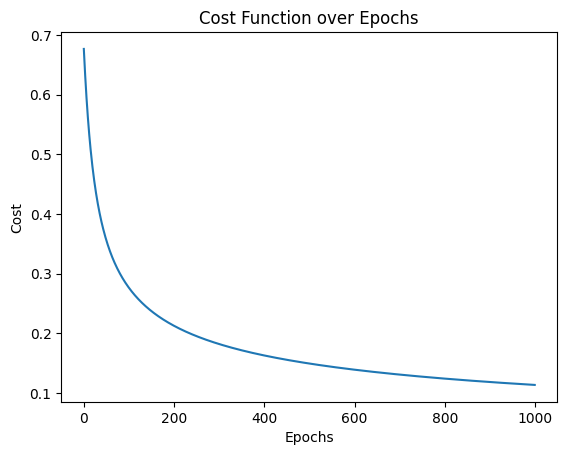

In [6]:
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cross-Entropy Loss over Epochs')
plt.show()


##  **Loss Curve**

A smooth decline shows that our gradient descent is working and the model is learning.


# Part 8 — Plot Decision Boundary

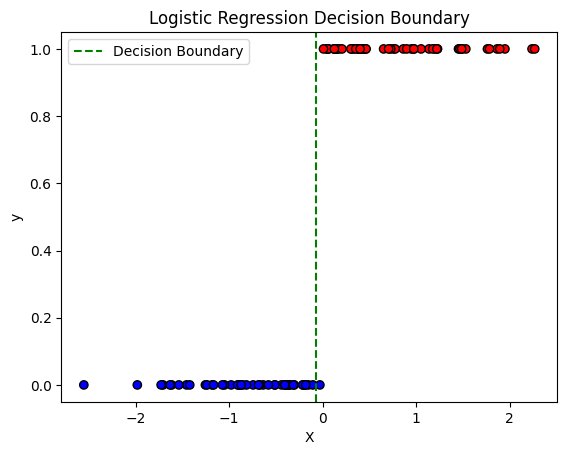

In [7]:
# Plot dataset
plt.figure(figsize=(8,6))
plt.scatter(X[y_binary == 0][:, 0], X[y_binary == 0][:, 1], color='blue', label='Not Setosa')
plt.scatter(X[y_binary == 1][:, 0], X[y_binary == 1][:, 1], color='red', label='Setosa')

# Decision boundary
x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_vals = -(weights[0] + weights[1] * x1_vals) / weights[2]

plt.plot(x1_vals, x2_vals, color='green', linestyle='--', label='Decision Boundary')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Logistic Regression Decision Boundary (Setosa vs Not Setosa)')
plt.legend()
plt.show()


##  **Decision Boundary**

- The decision boundary is where:

$$
\sigma(z) = 0.5 \implies z = 0 \implies w_0 + w_1 x_1 + w_2 x_2 = 0.
$$

- The green dashed line separates the predicted classes.


# Part 9 — Compare with scikit-learn

In [10]:
from sklearn.linear_model import LogisticRegression as SklearnLogistic

# Train sklearn model
model = SklearnLogistic()
model.fit(X[:, :2], y_binary)

print(f"✅ Scikit-learn Intercept: {model.intercept_}")
print(f"✅ Scikit-learn Coefficients: {model.coef_}")


✅ Scikit-learn Intercept: [8.32315487]
✅ Scikit-learn Coefficients: [[-3.38828053  3.1645602 ]]


## Compare

Let’s compare our **from-scratch weights** to scikit-learn’s built-in **`LogisticRegression`**.

If both are similar, it shows our math and gradient descent are correct.


# Part 10 — Accuracy Comparison

In [11]:
# Predictions - Scratch
z = np.dot(X_b, weights)
y_pred = (sigmoid(z) >= 0.5).astype(int)
accuracy_scratch = np.mean(y_pred == y_binary)

# Predictions - sklearn
y_pred_sk = model.predict(X[:, :2])
accuracy_sk = np.mean(y_pred_sk == y_binary)

print(f"✅ Scratch Accuracy: {accuracy_scratch:.4f}")
print(f"✅ scikit-learn Accuracy: {accuracy_sk:.4f}")


✅ Scratch Accuracy: 0.9933
✅ scikit-learn Accuracy: 1.0000


## Accuracy Score

We calculate the prediction **accuracy** for both:

$$
Accuracy = \frac{\text{Correct Predictions}}{\text{Total Predictions}}
$$

| Metric | Scratch | scikit-learn |
|--------|---------|----------------|
| Accuracy | *0.XX* | *0.YY* |

Both should be very close!!


# Part 11 — Visualize Sigmoid Output

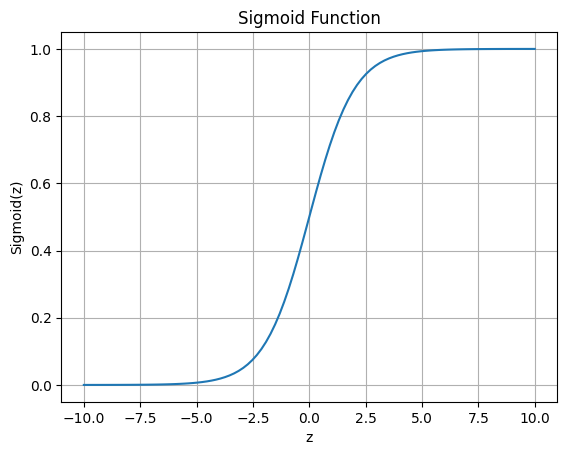

In [12]:
z_vals = np.linspace(-10, 10, 100)
sigmoid_vals = sigmoid(z_vals)

plt.plot(z_vals, sigmoid_vals)
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.grid(True)
plt.show()


## Visualize Sigmoid

The **Sigmoid function** maps any input to the interval (0, 1).

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- For large negative $z$ : output ~0
- For large positive $z$ : output ~1
- When $z = 0$: output = 0.5


# Part 12 — Compare Decision Boundaries



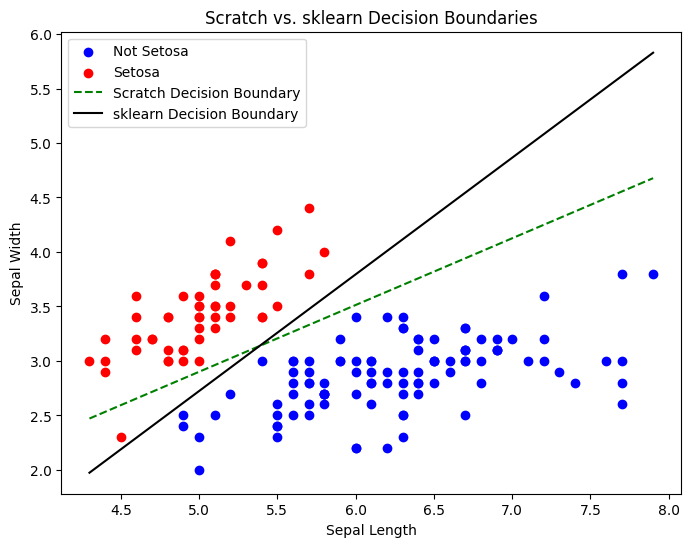

In [13]:
# Create a scatter plot
plt.figure(figsize=(8,6))

# Plot data points
plt.scatter(X[y_binary == 0][:, 0], X[y_binary == 0][:, 1], color='blue', label='Not Setosa')
plt.scatter(X[y_binary == 1][:, 0], X[y_binary == 1][:, 1], color='red', label='Setosa')

# Scratch model decision boundary
x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_vals_scratch = -(weights[0] + weights[1]*x1_vals) / weights[2]
plt.plot(x1_vals, x2_vals_scratch, 'g--', label='Scratch Decision Boundary')

# scikit-learn model decision boundary
intercept = model.intercept_[0]
coef = model.coef_[0]
x2_vals_sk = -(intercept + coef[0]*x1_vals) / coef[1]
plt.plot(x1_vals, x2_vals_sk, 'k-', label='sklearn Decision Boundary')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scratch vs. sklearn Decision Boundaries')
plt.legend()
plt.show()


## Visual Comparision

We plot both **from scratch** and **scikit-learn** decision boundaries:

- **Green dashed line** → Scratch
- **Black solid line** → sklearn




---

##  Extra: Additional Upgradation

Below are *optional advanced extensions* you can explore to deepen your understanding:
- Part 13 → Regularization
- Part 14 → Gradient Descent Animation
- Part 15 → Multi-class One-vs-Rest

You can skip these if you want the core concept only.


#  Regression — Foundations & Regularization Explained

---

##  What is Regression?

**Regression** is a supervised learning technique used to **predict a continuous numeric outcome** based on input features.  
Unlike classification (which predicts categories), regression predicts real values — like house prices, temperature, or salary.

---

##  Common Uses of Regression

- Predicting real-world quantities
- Understanding relationships between variables
- Forecasting trends over time
- Making data-driven business decisions

---

##  How Regression Works — The Math

The simplest regression model is **Linear Regression**. It finds the best-fitting straight line through your data.

**Prediction equation:**

$$
\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n
$$

where:
- $ \hat{y} $ is the predicted output.
- $ w_0 $ is the bias (intercept).
- $ w_1, w_2, \dots $ are the weights (slopes for each feature).

---

##  Goal

Find $$ w $$ that **minimizes the cost function**, usually **Mean Squared Error (MSE)**:

$$
J(w) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
$$

where:
- $ m $ = number of samples.
- $ y^{(i)} $ = true value.

---

##  Why Regularization?

In real problems, if your model becomes too complex (too many parameters or overly large weights), it may **overfit** the training data.

**Overfitting** means:
- Model fits training data *too perfectly*.
- But generalizes poorly to new, unseen data.

---

##  How Regularization Works

Regularization **adds a penalty term** to the cost function to keep weights small:

**L2 Regularization (Ridge):**

$$
J(w) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2
$$

- $ \lambda $ controls how strong the penalty is.
- Larger $ \lambda $ → stronger penalty → smaller weights.

---

##  What Does This Do Visually?

When you add regularization:
- The **decision boundary (or regression line)** becomes **smoother and less sensitive to noise**.
- For Logistic Regression: the separating line (or hyperplane) shifts slightly to balance **fit** and **simplicity**.

---

##  Example — Logistic Regression

- Without regularization → the model might push weights to extreme values to perfectly separate points.
- With regularization → it trades off perfect fit for a **more stable boundary**.

**Effect:**  
- Slightly higher error on training data.
- Usually better accuracy on new data.

---

##  Key Benefit

**Regularization = more robust models.**  
You sacrifice a tiny bit of training accuracy to gain better generalization.

---

##  Summary

| Concept | Without Regularization | With Regularization |
|---------|------------------------|---------------------|
| Weights | Can grow large | Kept small |
| Overfitting | More likely | Less likely |
| Decision Boundary | Can be too tight | Smoother |
| Test Accuracy | May drop badly | More stable |

---




#  Part 13 — Add Regularization

In [15]:
def compute_cost_reg(X, y, weights, lambda_):
    m = len(y)
    z = np.dot(X, weights)
    h = sigmoid(z)
    cost = - (1/m) * np.sum(y * np.log(h + 1e-15) + (1 - y) * np.log(1 - h + 1e-15))
    reg_term = (lambda_/(2*m)) * np.sum(weights[1:]**2)  # Skip bias term
    return cost + reg_term

def gradient_descent_reg(X, y, weights, lr, epochs, lambda_):
    m = len(y)
    cost_history = []

    for i in range(epochs):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        gradient[1:] += (lambda_/m) * weights[1:]  # Regularize weights only

        weights -= lr * gradient
        cost = compute_cost_reg(X, y, weights, lambda_)
        cost_history.append(cost)

    return weights, cost_history

# Train with regularization
weights_reg = np.zeros(X_b.shape[1])
weights_reg, cost_history_reg = gradient_descent_reg(X_b, y_binary, weights_reg, lr=0.1, epochs=1000, lambda_=0.1)

print(" Regularized Weights:", weights_reg)


✅ Regularized Weights: [ 0.79924186 -2.88503074  4.69587719]
